 ## Problem 1 </br>
   #### Equation :  d<sup>2</sup>y/dx<sup>2</sup> = x +y </br></br>

   #### Boundary Conditions - </br>
      y(0) = 0, y(1) = 0 
      h = 0.25 
 ## Problem 2 </br>
   #### Equation :  d<sup>2</sup>y/dx<sup>2</sup> +2*x*dy/dt +2*y = 4*x </br> </br>

   #### Boundary Conditions - </br>
      y(0) = 1, y(0.5) = 1.279    
      h = 0.1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Any given equation is of the general form  --> d<sup>2</sup>y / dx<sup>2</sup> + A(x) dy / dx + B(x) y = C(x) </br>
Hence we have to define A(x), B(x) and C(x) for every problem

In [13]:
# For Problem 1 only
'''
def A(x):
    return 0 
def B(x):
    return -1
def C(x):
    return x    
'''    

# For problem 2 only
def A(x):
    return 2*x
def B(x):
    return 2
def C(x):
    return 4*x   

### The Thomas Algorithm solves a tri-diagonal system efficiently

In [3]:
def thomas_algo(a, b, c, d):
    n = len(d)
    c_ = [0 for i in range(n)]
    d_ = [0 for i in range(n)]
    y = [0 for i in range(n)]

    c_[0] = c[0] / (1.0 * b[0])
    d_[0] = d[0] / (1.0 * b[0])
    
    for i in range(1,n):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])
    
    y[n-1] = d_[n-1]
    for i in range(n-2, -1, -1):
        y[i] = d_[i] - c_[i]*y[i+1]

    return y

### Function that converts a given BVP into a tri-diagonal system and solves it using Thomas Algorithm 

In [7]:
def bvp_type_1(l, y_l, r, y_r, h):
    n = int ((r-l) / (1.0*h))
    a = [0 for i in range(n-1)]
    b = [0 for i in range(n-1)]
    c = [0 for i in range(n-1)]
    d = [0 for i in range(n-1)]

    for i in range(n-1):
        # As i starts from 0, we define x = l + (i+1)*h
        x = l+(i+1)*h             
        a[i] = (1.0/h**2) - A(x)/(2.0*h)
        b[i] = -2.0/(h**2) + B(x)
        c[i] = 1.0/(h**2) + A(x)/(2*h)
        d[i] = C(x)
        if i == 0:
            d[i] =  d[i] - a[i] * y_l

    d[n-2] = d[n-2] -  c[n-2] * y_r
    return [y_l] + thomas_algo(a, b, c, d) + [y_r]    

### The main function calls the bvp_type_1 function with the necessary input parameters and plots the result

In [18]:
def main():
    '''
    # For problem 1
    a = 0
    b = 1
    y_a = 0
    y_b = 0
    h = 0.25
    '''
    
    # For problem 2
    a = 0
    b = 0.5
    y_a = 1
    y_b = 1.279
    h = 0.1
    
    x = np.linspace(a,b,(b - a)/h +1)
    y = bvp_type_1(a, y_a, b, y_b, h)
    print '\nx is \t %s' % x
    print 'y is \t %s' % y
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x, y)
    plt.show()


x is 	 [ 0.   0.1  0.2  0.3  0.4  0.5]
y is 	 [1, 1.0902945162901956, 1.1611714279748393, 1.2143439229664605, 1.2524899828524252, 1.279]


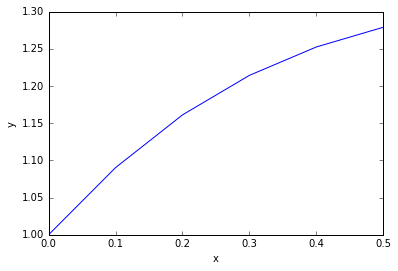

In [19]:
main()